In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [20]:
data=pd.read_excel("/Users/erdemtasdelen/Downloads/online_retail_II.xlsx")
data.to_csv("/Users/erdemtasdelen/Downloads/online_retail_II.csv", index=False)

In [21]:
data=pd.read_csv("/Users/erdemtasdelen/Downloads/online_retail_II.csv")
veri=data.copy()
print(veri)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.9

In [22]:
print(veri.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [23]:
veri=veri.dropna()


In [24]:
print(veri)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.9

In [25]:
veri["Total"]=veri["Quantity"]*veri["Price"]
print(veri)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country   Total  
0       2009-12-01 07:45:

In [26]:
print(veri[veri["Total"]<=0])

        Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
524695  C538123     22956          36 FOIL HEART CAKE CASES        -2   
524696  C538124         M                            Manual        -4   
524697  C538124     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
524698  C538124     22423          REGENCY CAKESTAND 3 TIER        -1   
525282  C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

                InvoiceDate  Price  Customer ID         Country  Total  
178     2009-12-01 10:33:00   2.95      16321.0   

In [27]:
veri=veri.drop(veri[veri["Total"]<=0].index)

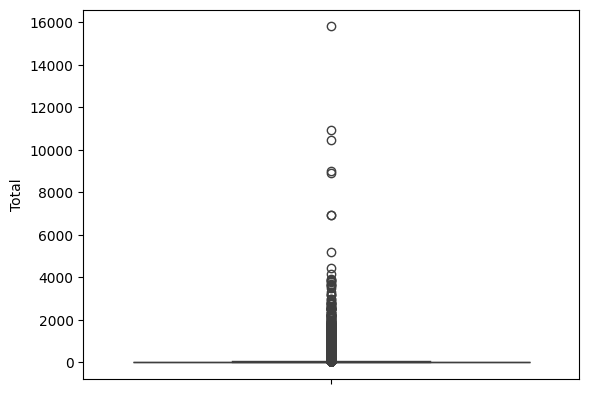

In [28]:
sns.boxplot(veri["Total"])
plt.show()

In [29]:
Q1=veri["Total"].quantile(0.25)
Q3=veri["Total"].quantile(0.75)

IQR=Q3-Q1

altsınır=Q1-1.5*IQR
ustsınır=Q3+1.5*IQR

veri=veri[~((veri["Total"]>ustsınır) | (veri["Total"]<altsınır))]
print(veri.shape)


(373815, 9)


In [30]:
print(veri)

       Invoice StockCode                         Description  Quantity  \
4       489434     21232      STRAWBERRY CERAMIC TRINKET BOX        24   
5       489434     22064          PINK DOUGHNUT TRINKET POT         24   
6       489434     21871                 SAVE THE PLANET MUG        24   
8       489435     22350                           CAT BOWL         12   
10      489435     22195        HEART MEASURING SPOONS LARGE        24   
...        ...       ...                                 ...       ...   
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931              JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  Total  
4       2009-12-01 07:45:00   1.25    

In [31]:
veri=veri.reset_index(drop=True)
print(veri)

       Invoice StockCode                         Description  Quantity  \
0       489434     21232      STRAWBERRY CERAMIC TRINKET BOX        24   
1       489434     22064          PINK DOUGHNUT TRINKET POT         24   
2       489434     21871                 SAVE THE PLANET MUG        24   
3       489435     22350                           CAT BOWL         12   
4       489435     22195        HEART MEASURING SPOONS LARGE        24   
...        ...       ...                                 ...       ...   
373810  538171     22271                FELTCRAFT DOLL ROSIE         2   
373811  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
373812  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
373813  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
373814  538171     21931              JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  Total  
0       2009-12-01 07:45:00   1.25    

In [32]:
print(len(veri["Customer ID"].unique()))

4141


In [33]:
print(len(veri["Invoice"].unique()))

17167


In [34]:
veri["Customer ID"]=veri["Customer ID"].astype("int")
print(veri)

       Invoice StockCode                         Description  Quantity  \
0       489434     21232      STRAWBERRY CERAMIC TRINKET BOX        24   
1       489434     22064          PINK DOUGHNUT TRINKET POT         24   
2       489434     21871                 SAVE THE PLANET MUG        24   
3       489435     22350                           CAT BOWL         12   
4       489435     22195        HEART MEASURING SPOONS LARGE        24   
...        ...       ...                                 ...       ...   
373810  538171     22271                FELTCRAFT DOLL ROSIE         2   
373811  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
373812  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
373813  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
373814  538171     21931              JUMBO STORAGE BAG SUKI         2   

                InvoiceDate  Price  Customer ID         Country  Total  
0       2009-12-01 07:45:00   1.25    

In [37]:
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373815 entries, 0 to 373814
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      373815 non-null  object        
 1   StockCode    373815 non-null  object        
 2   Description  373815 non-null  object        
 3   Quantity     373815 non-null  int64         
 4   InvoiceDate  373815 non-null  datetime64[ns]
 5   Price        373815 non-null  float64       
 6   Customer ID  373815 non-null  int64         
 7   Country      373815 non-null  object        
 8   Total        373815 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 25.7+ MB
None


In [36]:
veri["InvoiceDate"]=pd.to_datetime(veri["InvoiceDate"])

In [40]:
bugün=veri["InvoiceDate"].max()
print(bugün)

2010-12-09 20:01:00


In [43]:
bugün=dt.datetime(2010,12,9,20,1,00)
print(bugün)

2010-12-09 20:01:00


In [45]:
r=(bugün-veri.groupby("Customer ID").agg({"InvoiceDate":"max"})).apply(lambda x:x.dt.days)
print(r)

             InvoiceDate
Customer ID             
12346                164
12347                  2
12348                 73
12349                 42
12351                 10
...                  ...
18283                 17
18284                 66
18285                295
18286                111
18287                 17

[4141 rows x 1 columns]


In [47]:
f=veri.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
print(f)

                     Invoice
Customer ID Invoice         
12346       491742         1
            491744         1
            492718         1
            492722         1
            493410         1
...                      ...
18286       519785        50
18287       508581        52
            523289        13
            523290         2
            534346         6

[17167 rows x 1 columns]


In [48]:
f=f.groupby("Customer ID").agg({"Invoice":"count"})
print(f)

             Invoice
Customer ID         
12346             10
12347              2
12348              1
12349              2
12351              1
...              ...
18283              6
18284              1
18285              1
18286              2
18287              4

[4141 rows x 1 columns]


In [49]:
m=veri.groupby("Customer ID").agg({"Total":"sum"})
print(m)

               Total
Customer ID         
12346         327.86
12347        1196.72
12348         222.16
12349        1698.64
12351         300.93
...              ...
18283         641.77
18284         411.68
18285         173.00
18286        1063.58
18287        1316.27

[4141 rows x 1 columns]


In [52]:
RFM=r.merge(f,on="Customer ID").merge(m, on="Customer ID")
RFM=RFM.reset_index()
RFM=RFM.rename(columns={"Customer ID":"Customer", "InvoiceDate":"Recency", "Invoice":"Frequency", "Total":"Monetary"})
print(RFM)

      Customer  Recency  Frequency  Monetary
0        12346      164         10    327.86
1        12347        2          2   1196.72
2        12348       73          1    222.16
3        12349       42          2   1698.64
4        12351       10          1    300.93
...        ...      ...        ...       ...
4136     18283       17          6    641.77
4137     18284       66          1    411.68
4138     18285      295          1    173.00
4139     18286      111          2   1063.58
4140     18287       17          4   1316.27

[4141 rows x 4 columns]


In [54]:
df=RFM.iloc[:,1:]
print(df)

      Recency  Frequency  Monetary
0         164         10    327.86
1           2          2   1196.72
2          73          1    222.16
3          42          2   1698.64
4          10          1    300.93
...       ...        ...       ...
4136       17          6    641.77
4137       66          1    411.68
4138      295          1    173.00
4139      111          2   1063.58
4140       17          4   1316.27

[4141 rows x 3 columns]


In [56]:
sc=MinMaxScaler()
dfnorm=sc.fit_transform(df)
dfnorm=pd.DataFrame(dfnorm,columns=df.columns)
print(dfnorm.describe())

           Recency    Frequency     Monetary
count  4141.000000  4141.000000  4141.000000
mean      0.243349     0.017476     0.012018
std       0.259354     0.039514     0.025235
min       0.000000     0.000000     0.000000
25%       0.048257     0.000000     0.002590
50%       0.139410     0.005556     0.005894
75%       0.364611     0.022222     0.013732
max       1.000000     1.000000     1.000000


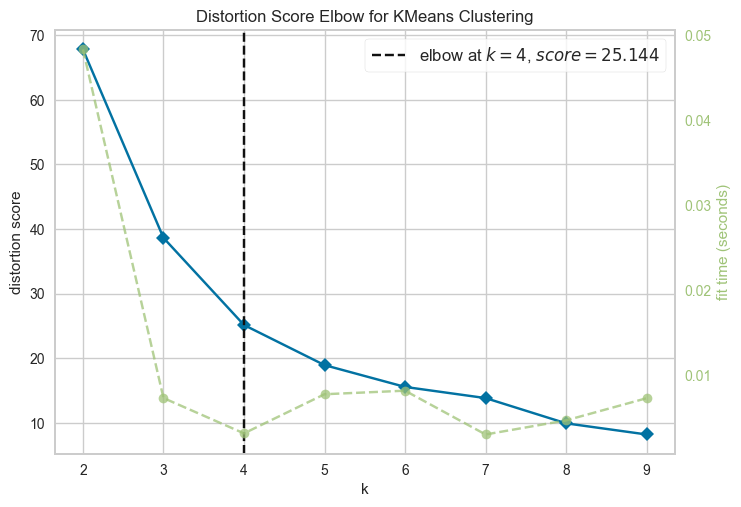

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
kmodel=KMeans(random_state=0)
grafik=KElbowVisualizer(kmodel, k=(2,10))
grafik.fit(dfnorm)
grafik.poof()

      Customer  Recency  Frequency  Monetary  Labels
0        12346      164         10    327.86       3
1        12347        2          2   1196.72       2
2        12348       73          1    222.16       0
3        12349       42          2   1698.64       2
4        12351       10          1    300.93       2
...        ...      ...        ...       ...     ...
4136     18283       17          6    641.77       2
4137     18284       66          1    411.68       0
4138     18285      295          1    173.00       1
4139     18286      111          2   1063.58       0
4140     18287       17          4   1316.27       2

[4141 rows x 5 columns]


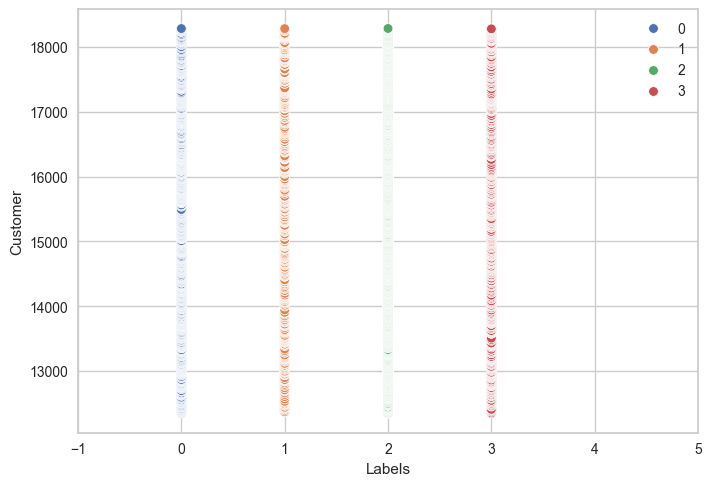

In [63]:
kmodel=KMeans(random_state=0, n_clusters=4, init="k-means++")
kfit=kmodel.fit(dfnorm)
labels=kfit.labels_

RFM["Labels"]=labels
print(RFM)

sns.scatterplot(x="Labels", y="Customer", data=RFM, hue=labels, palette="deep")
plt.xlim([-1,5])
plt.show()

In [66]:
print(RFM.groupby("Labels").mean().iloc[:,1:])

           Recency  Frequency     Monetary
Labels                                    
0        77.133393   3.034915   794.635569
1       303.364238   1.359823   277.694642
2        18.904201   6.103996  1618.314272
3       186.416801   2.012924   468.068079
